In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

In [3]:
#load the data
dataset=pd.read_csv("world.csv")

dataset=dataset.drop(["murder","urbanpopulation","unemployment"],axis=1)

means= dataset.mean().to_dict()

C:\Program Files\KMSpico\temp\ipykernel_7328\4066700126.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means= dataset.mean().to_dict()


In [5]:
for m in means:
    dataset[m]=dataset[m].fillna(value=means[m])
dataset    

,country,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.000000,57.90000,39.2,63.0,39.000000,38.579375,2183.725325,73.200000,4.800000,5800.000000,2090.000000,33700000
1,Albania,4.606651,11000.000000,77.60000,97.7,91.4,96.800000,29.000000,808.000000,14.000000,1.710000,217991.677852,3190.000000,2920000
2,Argentina,6.697131,19100.000000,76.50000,94.8,99.6,97.900000,41.400000,2020.000000,11.600000,2.310000,95000.000000,3230.000000,43400000
3,Armenia,4.348320,8180.000000,75.40000,91.6,98.9,99.600000,32.400000,1020.000000,14.000000,1.660000,3600.000000,2930.000000,2920000
4,Australia,7.309061,43800.000000,82.60000,100.0,100.0,81.573826,34.700000,5480.000000,3.800000,1.860000,22000.000000,3280.000000,23800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Tonga,5.395765,5190.000000,70.30000,93.5,99.9,99.000000,37.500000,567.000000,16.800000,3.680000,217991.677852,2845.952381,106000
190,Trinidad and Tobago,5.395765,31300.000000,73.10000,92.1,96.9,98.800000,40.300000,14400.000000,19.100000,1.770000,13000.000000,3050.000000,1360000
191,Tuvalu,5.395765,3320.000000,71.93369,91.4,99.3,81.573826,39.100000,2183.725325,26.200000,2.835924,217991.677852,2845.952381,11000
192,Vanuatu,5.395765,2810.000000,63.60000,53.5,90.5,83.200000,37.600000,159.000000,28.200000,3.310000,217991.677852,2840.000000,265000


In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


style 

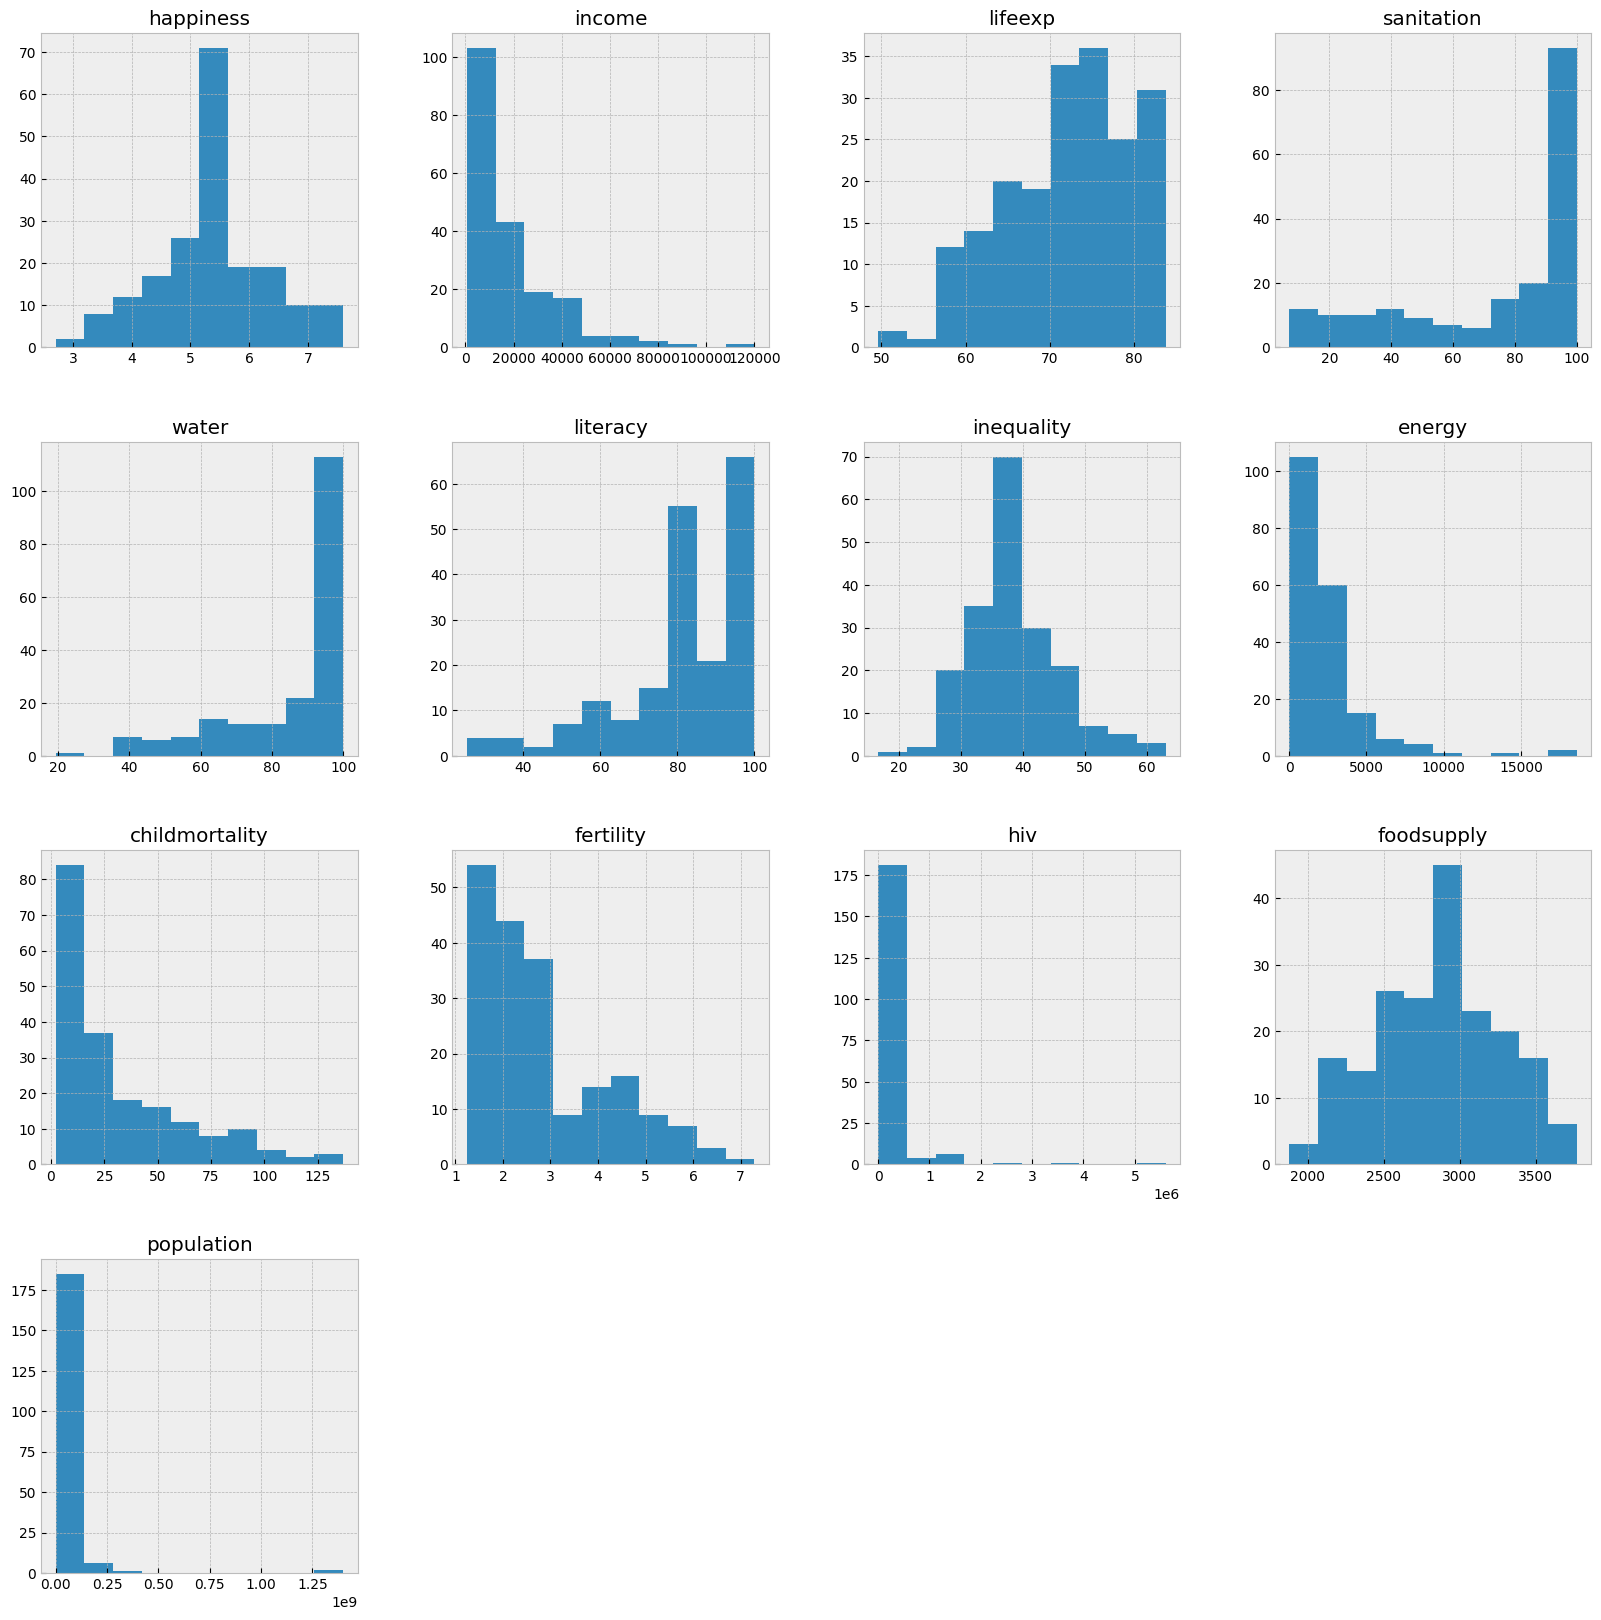

In [9]:
plt.style.use("bmh")
dataset.hist(figsize=(20,20))
plt.show()

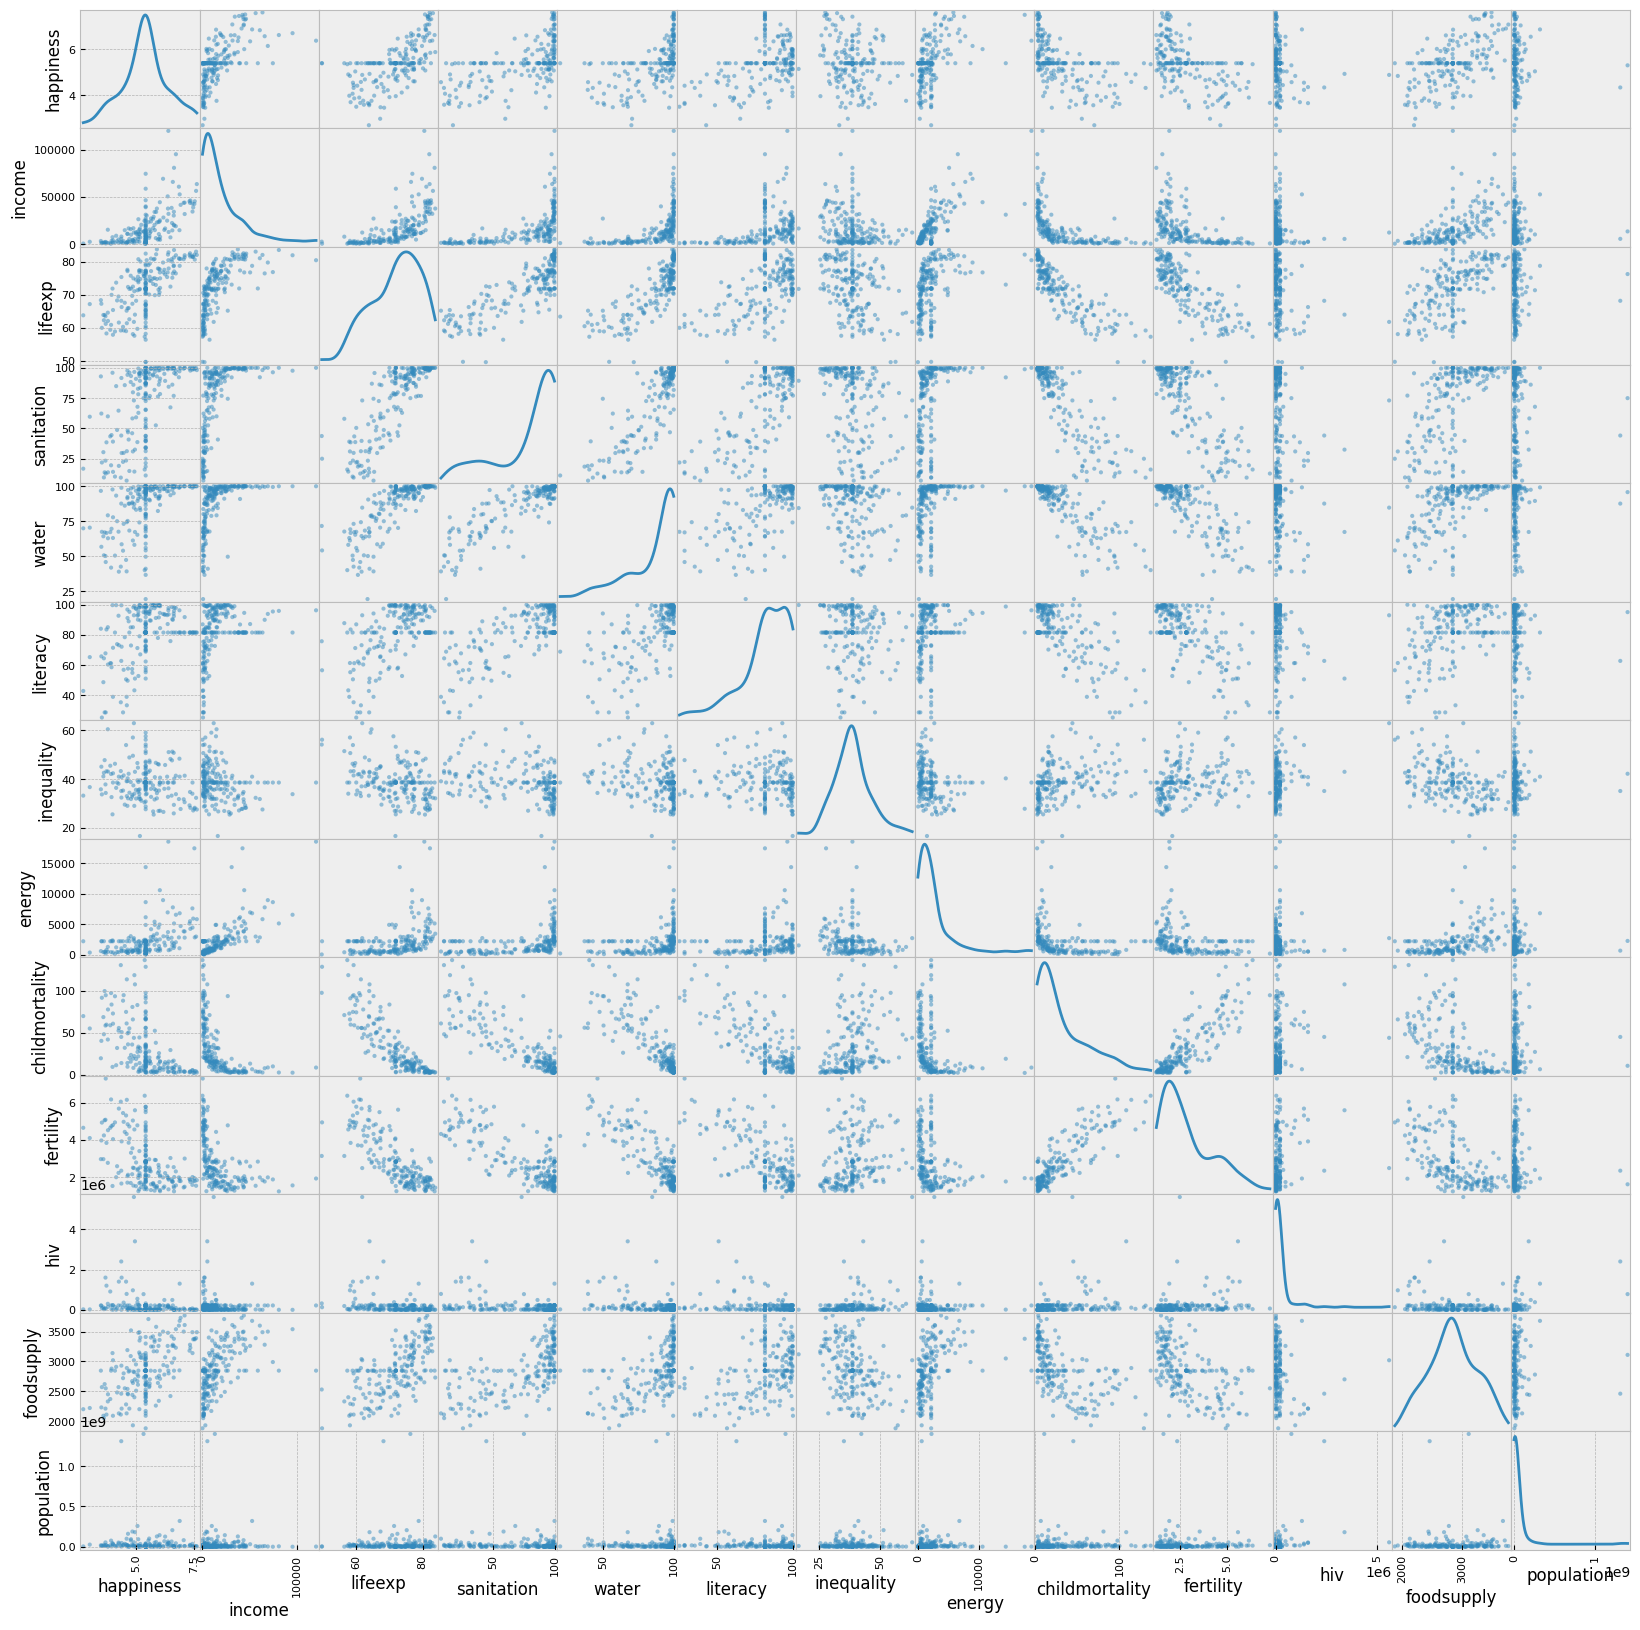

In [10]:
scatterMatrix(dataset)

In [11]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

In [13]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)
X

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
0,0.261384,0.009441,0.345674,0.541512,0.183400,0.473693,0.116950,0.526706,0.588430,0.001025,0.111111,0.024064
1,0.388642,0.086926,0.975248,0.893432,0.957162,0.267241,0.042948,0.087537,0.077686,0.038917,0.693122,0.002078
2,0.815110,0.154779,0.944038,0.995043,0.971888,0.534483,0.108143,0.069733,0.176860,0.016954,0.714286,0.030992
3,0.335941,0.063304,0.909600,0.986369,0.994645,0.340517,0.054352,0.087537,0.069421,0.000632,0.555556,0.002078
4,0.939946,0.361686,1.000000,1.000000,0.753331,0.390086,0.294260,0.011869,0.102479,0.003918,0.740741,0.016992
...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.549625,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.038917,0.511086,0.000068
190,0.549625,0.256976,0.914981,0.961586,0.983936,0.510776,0.774077,0.125371,0.087603,0.002311,0.619048,0.000964
191,0.549625,0.022592,0.907447,0.991326,0.753331,0.484914,0.116950,0.178042,0.263789,0.038917,0.511086,0.000000
192,0.549625,0.018320,0.499570,0.882280,0.775100,0.452586,0.008037,0.192878,0.342149,0.038917,0.507937,0.000181


In [14]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
models = [LinearRegression(), KNeighborsRegressor()]

In [17]:
for model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train,predictions))

LinearRegression 2.2920035925091766
KNeighborsRegressor 2.1955055341375447


In [18]:
for model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test,predictions))

LinearRegression 2.44639565081103
KNeighborsRegressor 2.5532340600575916


In [26]:
model=models[0]
predictions= model.predict(X_test)
df=X_test.copy()
df["predictions"]=predictions
df["actual"]=Y_test
df["Error"]=Y_test-predictions
df
print(model.coef_)
print(model.intercept_)

[  5.00912637   9.2096769    5.41605897   2.26122297  -4.13876626
  -3.31059309  -5.53211396 -14.32217202  -1.63521978  -2.01476135
   2.22581396   3.20586791]
69.60409836404614


In [29]:
models[1].kneighbors(X)
models[1].kneighbors_graph(X).toarray()[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])